##  - 파일확인 단계

In [1]:
import pandas as pd
import os 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('C:/dacon/ch04/data09(1)/store_amount_prediction')## os모듈을 통해 설정하고 싶은 작업 경로를 인자로 넘겨주어 작업 디렉토리 변경
train = pd.read_csv('./funda_train.csv')
submission = pd.read_csv('./submission.csv')

In [4]:
train.shape

(6556613, 9)

In [5]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
store_id            int64
card_id             int64
card_company        object
transacted_date     object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [7]:
train[:-5]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556603,2136,4663852,a,2019-02-28,22:35,0,제주 제주시,기타 주점업,4571.428571
6556604,2136,4663853,e,2019-02-28,22:43,0,제주 제주시,기타 주점업,3571.428571
6556605,2136,4663666,f,2019-02-28,22:45,0,제주 제주시,기타 주점업,7428.571429
6556606,2136,4663854,f,2019-02-28,23:03,0,제주 제주시,기타 주점업,3928.571429


In [8]:
train[train['amount']<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01,21:19,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15,00:46,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18,02:45,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18,21:43,0,제주 제주시,기타 주점업,-8571.428571


## 실습

## 4.2 데이터 전처리

### 4.2.1 노이즈 제거

#### 데이터에서 노이즈 = > 이상치, 결측치뿐만 아니라 학습 알고리즘에 데이터를 주입할 때 예측의 정확도를 떨어뜨리는 모든 것을 말한다.
#### 제공된 데이터에서 노이즈를 찾아보고 제거하는 과정 진행

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
train = pd.read_csv('C:/dacon/ch04/data09(1)/store_amount_prediction/funda_train.csv')
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

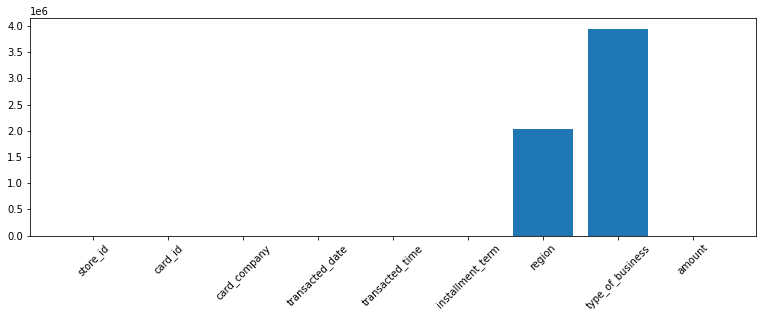

In [10]:
plt.figure(figsize=(13, 4))
plt.bar(train.columns, train.isnull().sum())
plt.xticks(rotation=45)

In [11]:
train = train.drop(['region','type_of_business'],axis=1)
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


In [12]:
import warnings
warnings.filterwarnings('ignore')

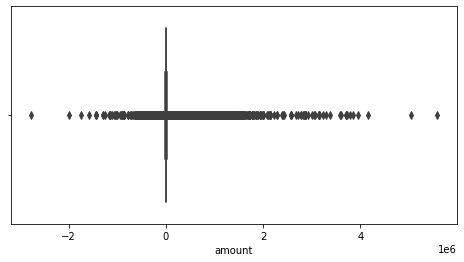

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(train['amount'])

In [14]:
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857


In [15]:
# 거래일과 거래시간을 합친 변수를 생성합니다.
train['datetime'] = pd.to_datetime(train.transacted_date + " " + train.transacted_time, format='%Y-%m-%d %H:%M:%S')

# 환불 거래를 제거하는 함수를 정의합니다.
def remove_refund(df):
    refund = df[df['amount']<0] # 매출액 음숫값 데이터를 추출합니다.
    non_refund = df[df['amount']>0] # 매출액 양숫값 데이터를 추출합니다.
    removed_data = pd.DataFrame()
    
    for i in tqdm(df.store_id.unique()):
        #매출액이 양숫값인 데이터를 상점별로 나눔
        divided_data=non_refund[non_refund['store_id']==i] ##non_refund 스토어 데이터를 스토어별로 나눔
        
        #매출액이 음숫값인 데이터를 상점별로 나눔
        divided_data2=refund[refund['store_id']==i] ##refund 스토어 데이터를 나눔 스토어별로 나눔
        
        for neg in divided_data2.to_records()[:]: ##환불데이터를 차례대로 검사
            refund_store=neg['store_id']
            refund_id=neg['card_id'] ## 환불 카드 아이디
            refund_datetime=neg['datetime'] ## 환불 시간
            refund_amount=abs(neg['amount']) ## 환불액 절대값을 씌움
            
            ##환불시간 이전의 데이터중 카드이이디와 환불액이 같은 후보 리스트를 뽑는다.
            
            refund_pay_list=divided_data[divided_data['datetime']<=refund_datetime] ##??
            refund_pay_list=refund_pay_list[refund_pay_list['card_id']==refund_id]
            refund_pay_list=refund_pay_list[refund_pay_list['amount']==refund_amount]
            
            #후보리스트가 있으면 카드아이디, 환불액이 같으면서 가장 최근시간을 제거
            if len(refund_pay_list) !=0:
                
                
                refund_datetime=max(refund_pay_list['datetime']) ##가장 최근 시간을 구한다
                
                noise_list=divided_data[divided_data['datetime']==refund_datetime] ##가장 최근시간 ##??
                
                noise_list=noise_list[noise_list['card_id']==refund_id] ##환불 카드 아이디
                
                noise_list=noise_list[noise_list['amount']==refund_amount] ##환불액
                
                divided_data=divided_data.drop(index=noise_list.index) #인덱스를 통해 제거
                
                
         ##제거한데이터를 데이터프레임에 추가한다.
        removed_data=pd.concat([removed_data, divided_data], axis=0)
        
    return removed_data

In [16]:
#환불 거래 제거 함수를 통해 환불 거래를 제거한다.

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [14:26<00:00,  2.27it/s]


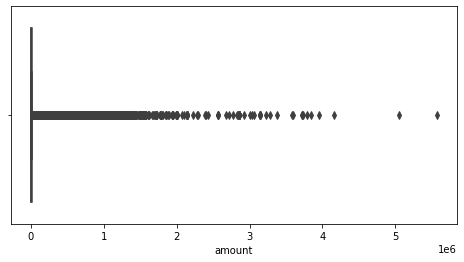

In [17]:
positive_data = remove_refund(train)
plt.figure(figsize=(8, 4))
sns.boxplot(positive_data['amount'])

### 4.2.2 다운 샘플링

#### 다운 샘플링이란 시계열 데이터에서 시간 간격을 넓게 재조정해 데이터 샘플 수를 줄이는 것을 말한다.
#### 향후 3개월 동안 상점 매출의 총합을 구하는 것이 문제.

#### 시간 간격을 좁게 해서 시계열 모델을 만들면 예측해야 하는 구간이 커져 불확실성이 증가한다.
#### => 다운샘플링 과정을 통해 샘플 수를 줄이고 예측 구간을 작게 해서 불확실성을 줄여야 한다.

In [18]:
positive_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,2000.000000,2016-06-02 11:06:00


In [19]:
# 월 단위 다운 샘플링 함수를 정의
def month_resampling(df):
    new_data = pd.DataFrame()
    # 년도와 월을 합친 변수를 생성한다.
    df['year_month'] = df['transacted_date'].str.slice(stop=7)
    # 데이터의 전체 기간을 추출한다.
    year_month = df['year_month'].drop_duplicates()
    # 상점 아이디별로 월 단위 매출액 총합을 구한다.
    downsampling_data = df.groupby(['store_id', 'year_month']).amount.sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False, inplace=False)
    
    for i in tqdm(df.store_id.unique()):
        # 상점별로 데이터를 처리한다.
        store = downsampling_data[downsampling_data['store_id'] == i]
        # 각 상점의 처음 매출이 발생한 월을 구한다.
        start_time = min(store['year_month'])
        # 모든 상점을 전체 기간 데이터로 만든다.
        store = store.merge(year_month, how ='outer')
        # 데이터를 시간순으로 정렬
        store = store.sort_values(by=['year_month'], axis=0, ascending=True)
        # 매출이 발생하지 않는 월을 2로 채운다.
        store['amount'] = store['amount'].fillna(2)
        # 상점 아이디 결측치를 채운다.
        store['store_id'] = store['store_id'].fillna(i)
        # 처음 매출이 발생한 월 이후만 뽑는다.
        store = store[store['year_month']>=start_time]
        
        new_data = pd.concat([new_data,store],axis=0)
        
    return new_data

In [20]:
resampling_data = month_resampling(positive_data) ## positive data는 환불거래 제거함수에서 변수로 지정된걸 가져옴
resampling_data['store_id'] = resampling_data['store_id'].astype(int) ## 숫자형 데이터로 변환
resampling_data

100%|█████████████████████████████████████████████████████████████████████████████| 1967/1967 [00:13<00:00, 147.86it/s]


,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
17,2136,2018-10,2.012214e+06
18,2136,2018-11,2.127643e+06
19,2136,2018-12,2.427429e+06
20,2136,2019-01,1.867786e+06


#### 4.2.3 날짜 지정 범위 생성과 시리즈 객체 변환
#### 시계열 데이터의 정상성을 확인하기 위한 단위근 검정과 시계열 모델 구축 과정에서 시리즈 객체 사용

#### 시리즈 객체로 변환하기 전에 인덱스를 시간 변수로 정의한다. 시간 변수의 날짜 지정 범위를 생성하는데
#### 판다스에서 date_range 함수가 그 기능을 제공

#### 시리즈에 날짜 지정 범위를 생성하고 시리즈 객체까지 변환하는 작업 진행

In [21]:
print(type(resampling_data))

<class 'pandas.core.frame.DataFrame'>


In [22]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df, i):
    # 상점별로 데이터를 뽑습니다.
    store = df[df['store_id']==i]
    ## 날짜 지정 범위는 영업 시작 월부터 2019년 3월 전까지 영업 마감일 기준
    index = pd.date_range(min(store['year_month']), '2019-03', freq='BM')
    ## 시리즈 객체로 변환
    ts = pd.Series(store['amount'].values, index=index)
    return ts

In [23]:
# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)
store_0

2016-06-30    7.470000e+05
2016-07-29    1.005000e+06
2016-08-31    8.697143e+05
2016-09-30    8.978571e+05
2016-10-31    8.354286e+05
2016-11-30    6.970000e+05
2016-12-30    7.618571e+05
2017-01-31    5.856429e+05
2017-02-28    7.940000e+05
2017-03-31    7.202571e+05
2017-04-28    6.852857e+05
2017-05-31    7.444286e+05
2017-06-30    6.820000e+05
2017-07-31    7.282857e+05
2017-08-31    7.490000e+05
2017-09-29    8.408571e+05
2017-10-31    6.005714e+05
2017-11-30    6.308571e+05
2017-12-29    8.127143e+05
2018-01-31    6.431429e+05
2018-02-28    6.852857e+05
2018-03-30    8.484286e+05
2018-04-30    6.361429e+05
2018-05-31    6.864286e+05
2018-06-29    7.072857e+05
2018-07-31    7.587143e+05
2018-08-31    6.798571e+05
2018-09-28    6.518571e+05
2018-10-31    7.390000e+05
2018-11-30    6.760000e+05
2018-12-31    8.745714e+05
2019-01-31    6.828571e+05
2019-02-28    5.152857e+05
Freq: BM, dtype: float64

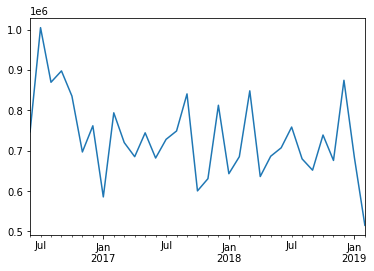

In [71]:
store_0 = time_series(resampling_data, 0)
store_0.plot()

In [25]:
store_1 = time_series(resampling_data, 1)
print(type(store_1))

<class 'pandas.core.series.Series'>


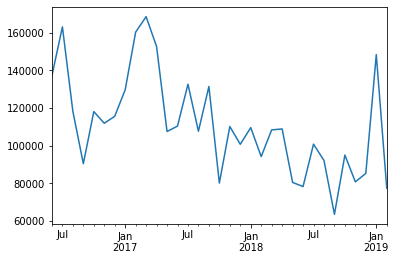

In [70]:
store_1 = time_series(resampling_data, 1)
store_1.plot()

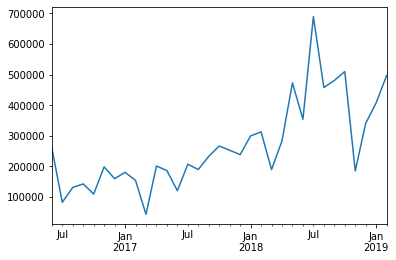

In [27]:
# 상점 아이디가 2번인 데이터를 시리즈 객체로 변환
store_2 = time_series(resampling_data, 2)
store_2.plot()

## 4.3 탐색적 데이터 분석
#### 상점별 매출액 시계열 그래프를 통해 매출 특성을 파악하는 과정과 시계열 데이터의 평균과 분산이 안정적인지 확인하기 위해
#### ADF-TEST를 진행하고 이를 통해 시계열 데이터가 정상 시계열인지 확인하는 과정

### " "

#### 4.3.1 상점별 매출 특성
### 상점의 특징을 계절성이 있는 상점, 추세가 있는 상점, 휴업 중인 상점 등 크게 세 가지로 분류

##### 계절성이 있는 상점

In [28]:
store_257 = time_series(resampling_data, 257)
store_257

2016-06-30    4.891857e+05
2016-07-29    1.595280e+06
2016-08-31    1.518714e+06
2016-09-30    3.369143e+05
2016-10-31    4.245714e+05
2016-11-30    2.000000e+00
2016-12-30    2.000000e+00
2017-01-31    2.000000e+00
2017-02-28    2.000000e+00
2017-03-31    2.000000e+00
2017-04-28    3.928571e+04
2017-05-31    1.557286e+05
2017-06-30    5.481143e+05
2017-07-31    7.359286e+05
2017-08-31    7.909700e+05
2017-09-29    6.191429e+04
2017-10-31    1.027143e+06
2017-11-30    2.000000e+00
2017-12-29    2.000000e+00
2018-01-31    2.000000e+00
2018-02-28    2.000000e+00
2018-03-30    2.000000e+00
2018-04-30    2.000000e+00
2018-05-31    2.493857e+05
2018-06-29    4.822286e+05
2018-07-31    8.999714e+05
2018-08-31    1.645877e+06
2018-09-28    2.767857e+05
2018-10-31    2.000000e+00
2018-11-30    2.000000e+00
2018-12-31    2.000000e+00
2019-01-31    2.000000e+00
2019-02-28    2.000000e+00
Freq: BM, dtype: float64

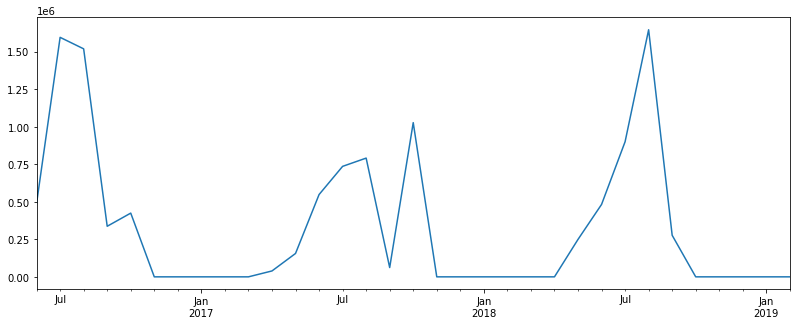

In [29]:
# 시계열 그래프 그리기
store_plot_257 = store_257.plot()
fig = store_plot_257.get_figure()
fig.set_size_inches(13.5, 5)

In [30]:
# 상점 아이디가 2096번인 데이터를 시리즈 객체로 데이터 출력
store_2096 = time_series(resampling_data, 2096)
store_2096

2016-07-29    5.075429e+04
2016-08-31    9.219543e+05
2016-09-30    4.720786e+05
2016-10-31    5.145714e+05
2016-11-30    1.494286e+05
2016-12-30    1.071686e+06
2017-01-31    1.602857e+06
2017-02-28    1.332143e+06
2017-03-31    2.432143e+05
2017-04-28    3.903143e+06
2017-05-31    1.729500e+06
2017-06-30    4.280214e+06
2017-07-31    1.775714e+06
2017-08-31    7.428571e+05
2017-09-29    1.415714e+06
2017-10-31    1.180714e+06
2017-11-30    4.640000e+05
2017-12-29    1.389729e+06
2018-01-31    2.000000e+00
2018-02-28    8.285714e+05
2018-03-30    7.857143e+05
2018-04-30    6.670429e+06
2018-05-31    1.837286e+05
2018-06-29    3.285714e+06
2018-07-31    9.502857e+05
2018-08-31    3.675200e+06
2018-09-28    1.793886e+06
2018-10-31    4.717743e+06
2018-11-30    7.593600e+06
2018-12-31    1.428571e+06
2019-01-31    4.285714e+05
2019-02-28    1.428571e+06
Freq: BM, dtype: float64

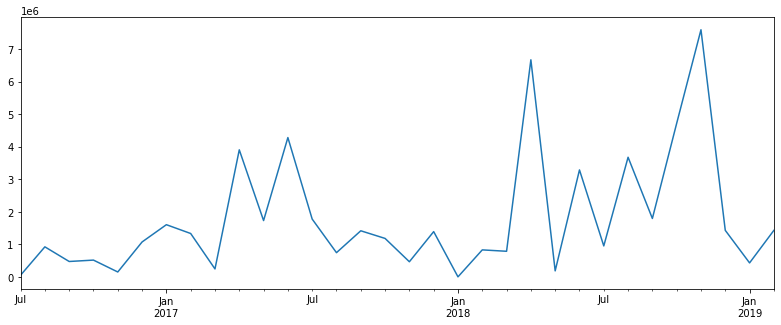

In [31]:
store_plot_2096 = store_2096.plot()
fig = store_plot_2096.get_figure()
fig.set_size_inches(13.5, 5)

In [32]:
# 연습(계절성이 있나?)
store_2 = time_series(resampling_data, 2)
store_2

2016-06-30    260714.285714
2016-07-29     82857.142857
2016-08-31    131428.571429
2016-09-30    142857.142857
2016-10-31    109714.285714
2016-11-30    198571.428571
2016-12-30    160000.000000
2017-01-31    180714.285714
2017-02-28    154285.714286
2017-03-31     43571.428571
2017-04-28    201428.571429
2017-05-31    186428.571429
2017-06-30    120571.428571
2017-07-31    207142.857143
2017-08-31    190000.000000
2017-09-29    232857.142857
2017-10-31    266714.285714
2017-11-30    252857.142857
2017-12-29    238571.428571
2018-01-31    299714.285714
2018-02-28    312857.142857
2018-03-30    189714.285714
2018-04-30    283571.428571
2018-05-31    472857.142857
2018-06-29    354285.714286
2018-07-31    689285.714286
2018-08-31    457857.142857
2018-09-28    480714.285714
2018-10-31    510000.000000
2018-11-30    185428.571429
2018-12-31    340714.285714
2019-01-31    407857.142857
2019-02-28    496857.142857
Freq: BM, dtype: float64

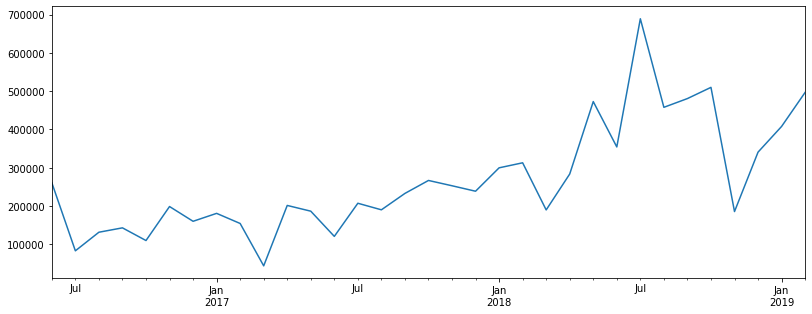

In [33]:
store_plot_2 = store_2.plot() #계절성 안보인다(2018년 7월에 급상승)
fig = store_plot_2.get_figure()
fig.set_size_inches(13.5, 5)

##### 추세가 있는 상점

In [34]:
# 추세가 있는 상점
# 상점 아이디가 335번인 상점의 시계열 그래프(매출액 감소추세와 증가추세 둘다 있다.)
store_335 = time_series(resampling_data, 335)

In [35]:
store_335

2016-06-30    2.733714e+06
2016-07-29    3.612429e+06
2016-08-31    4.053143e+06
2016-09-30    2.938714e+06
2016-10-31    3.548857e+06
2016-11-30    3.426857e+06
2016-12-30    3.404286e+06
2017-01-31    3.365000e+06
2017-02-28    3.436000e+06
2017-03-31    3.506000e+06
2017-04-28    3.299743e+06
2017-05-31    2.660000e+06
2017-06-30    3.170571e+06
2017-07-31    2.118714e+06
2017-08-31    1.682286e+06
2017-09-29    1.870857e+06
2017-10-31    1.126857e+06
2017-11-30    1.872714e+06
2017-12-29    1.662571e+06
2018-01-31    2.514714e+06
2018-02-28    2.367429e+06
2018-03-30    3.021429e+06
2018-04-30    2.731286e+06
2018-05-31    2.434429e+06
2018-06-29    2.737857e+06
2018-07-31    2.703143e+06
2018-08-31    2.764429e+06
2018-09-28    3.206714e+06
2018-10-31    3.574000e+06
2018-11-30    3.111714e+06
2018-12-31    3.334586e+06
2019-01-31    3.038714e+06
2019-02-28    2.959857e+06
Freq: BM, dtype: float64

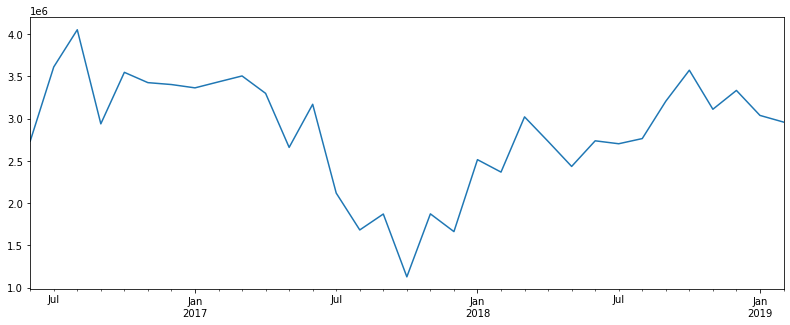

In [36]:
store_plot_335 = store_335.plot()
fig = store_plot_335.get_figure()
fig.set_size_inches(13.5, 5)

In [37]:
store_510 = time_series(resampling_data, 510)
store_510

2016-12-30    170828.571429
2017-01-31    252310.000000
2017-02-28    232471.428571
2017-03-31    461571.428571
2017-04-28    477444.285714
2017-05-31    544828.571429
2017-06-30    652042.857143
2017-07-31    564457.142857
2017-08-31    605885.714286
2017-09-29    696964.285714
2017-10-31    590792.857143
2017-11-30    500951.428571
2017-12-29    565114.285714
2018-01-31    483914.285714
2018-02-28    309590.000000
2018-03-30    363481.428571
2018-04-30    306951.428571
2018-05-31    317664.285714
2018-06-29    230182.857143
2018-07-31    200429.000000
2018-08-31     26657.142857
2018-09-28     41328.571429
2018-10-31     43157.142857
2018-11-30     53740.000000
2018-12-31     36057.142857
2019-01-31     40815.714286
2019-02-28     28265.714286
Freq: BM, dtype: float64

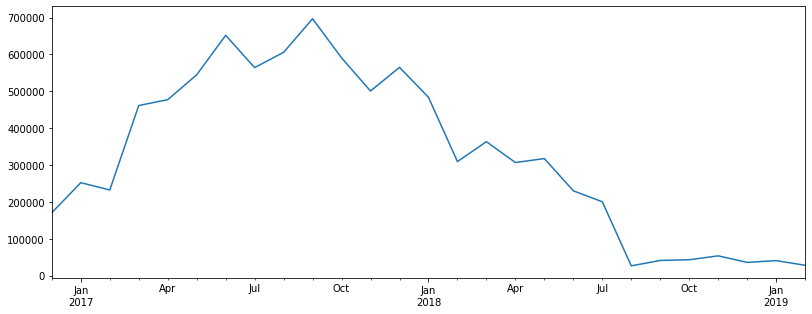

In [38]:
# 상점 아이디가 510번인 상점의 시계열 그래프(매출액 감소추세가 있다)
store_510 = time_series(resampling_data, 510)
store_plot_510 = store_510.plot()
fig = store_plot_510.get_figure()
fig.set_size_inches(13.5, 5)

##### 휴업 중인 상점

In [39]:
# 휴업 중인 상점
#  상점 아이디가 111번인 데이터를 시리즈 객체로 데이터 출력
store_111 = time_series(resampling_data, 111)
store_111

2016-06-30    812428.571429
2016-07-29    391142.857143
2016-08-31     13071.428571
2016-09-30    495714.285714
2016-10-31    182714.285714
2016-11-30    178571.428571
2016-12-30     43005.714286
2017-01-31         2.000000
2017-02-28      5428.571429
2017-03-31     24857.142857
2017-04-28    108000.000000
2017-05-31    459142.857143
2017-06-30    137571.428571
2017-07-31    216285.714286
2017-08-31     77000.000000
2017-09-29     78005.714286
2017-10-31         2.000000
2017-11-30         2.000000
2017-12-29         2.000000
2018-01-31      1428.571429
2018-02-28    309785.714286
2018-03-30    259071.428571
2018-04-30    225858.571429
2018-05-31    105571.428571
2018-06-29         2.000000
2018-07-31    123285.714286
2018-08-31         2.000000
2018-09-28     83000.000000
2018-10-31         2.000000
2018-11-30         2.000000
2018-12-31         2.000000
2019-01-31         2.000000
2019-02-28         2.000000
Freq: BM, dtype: float64

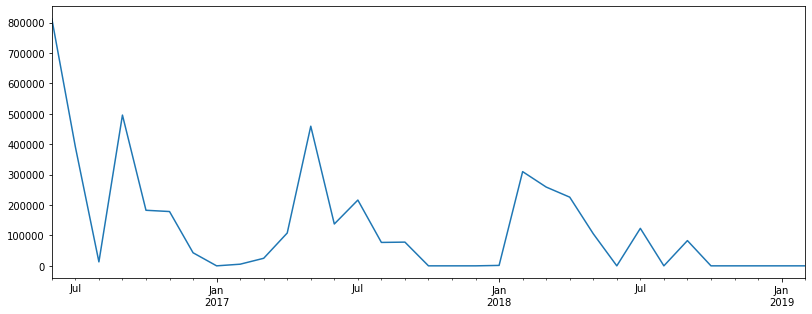

In [40]:
# 상점 아이디가 111번인 상점의 시계열 그래프
store_plot_111 = store_111.plot()
fig = store_plot_111.get_figure()
fig.set_size_inches(13.5, 5)

In [41]:
# 장기로 휴업하고 영업을 재개한 279번 상점 데이터를 시리즈 객체로 데이터 출력
store_279 = time_series(resampling_data, 279)
store_279

2016-06-30    4.488571e+05
2016-07-29    1.156286e+06
2016-08-31    1.372857e+06
2016-09-30    3.150000e+05
2016-10-31    8.748571e+05
2016-11-30    3.128571e+05
2016-12-30    5.828571e+05
2017-01-31    3.214286e+04
2017-02-28    2.000000e+00
2017-03-31    4.955714e+05
2017-04-28    5.940000e+05
2017-05-31    1.041143e+06
2017-06-30    8.354286e+05
2017-07-31    6.171429e+05
2017-08-31    4.284286e+05
2017-09-29    1.581258e+06
2017-10-31    3.294286e+05
2017-11-30    2.241429e+05
2017-12-29    2.785714e+05
2018-01-31    4.018571e+05
2018-02-28    1.282857e+05
2018-03-30    2.000000e+00
2018-04-30    2.000000e+00
2018-05-31    2.000000e+00
2018-06-29    2.000000e+00
2018-07-31    2.000000e+00
2018-08-31    2.000000e+00
2018-09-28    2.000000e+00
2018-10-31    2.000000e+00
2018-11-30    2.101429e+05
2018-12-31    2.191571e+05
2019-01-31    1.779286e+05
2019-02-28    5.157143e+04
Freq: BM, dtype: float64

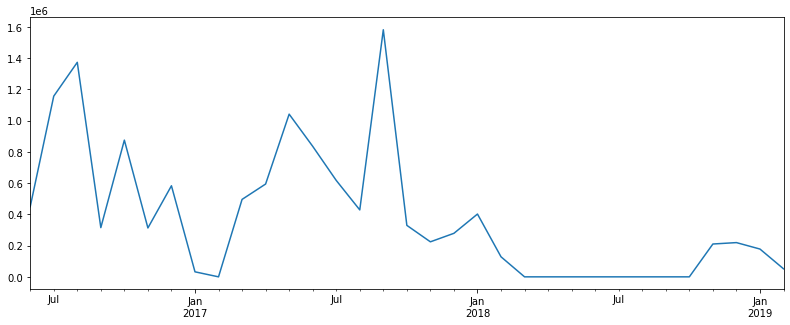

In [42]:
# 상점 아이디가 279번인 상점의 시계열 그래프
store_plot_279 = store_279.plot()
fig = store_plot_279.get_figure()
fig.set_size_inches(13.5, 5)

##### 시계열 데이터의 정상성
#### ADF - Test

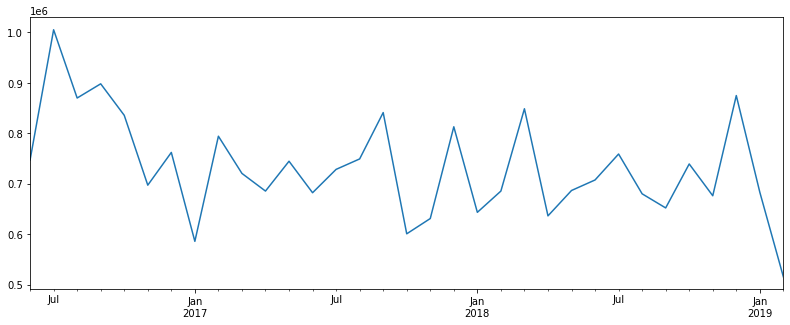

In [43]:
# 시계열 데이터의 정상성
# 상점 아이디가 0번인 상점의 시계열 그래프
store_0 = time_series(resampling_data, 0)
store_plot_0 = store_0.plot()
fig = store_plot_0.get_figure()
fig.set_size_inches(13.5, 5)

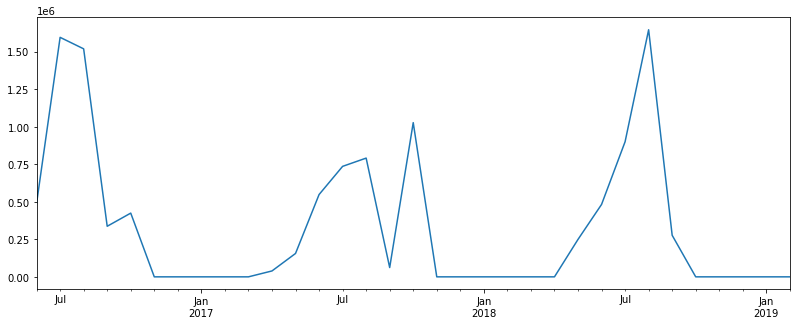

In [44]:
# 상점 아이디가 257번인 상점의 시계열 그래프
store_257 = time_series(resampling_data, 257)
store_plot_257 = store_257.plot()
fig = store_plot_257.get_figure()
fig.set_size_inches(13.5, 5)

In [45]:
# pmdarima 패키지에 있는 ADFTest 클래스를 임포트
from pmdarima.arima import ADFTest

# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)

# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(store_0)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))
#P-VALUE 값을 따져서 유의수준 0.05보다 작으면 귀무가설 기각 대립가설 채택 = >정상시계열이다(통계적으로 의미가 있다)

p_val : 0.022488 , should_diff : False


In [46]:
# 상점 아이디가 257번인 데이터를 시리즈 객체로 변환
store_257 = time_series(resampling_data, 257)

# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(store_257)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))
#P-VALUE 값을 따져서 유의수준 0.05보다 크면 귀무가설 채택 대립가설 기각 = > 정상시계열 X(통계적으로 의미가 없다.)

p_val : 0.093614 , should_diff : True


* unique 말 그대로 독특하고 유일무이한, 고유한 이라는 뜻을 가진 단어로 ndarray 형태나 category 형태의 데이터에서 고유한 데이터만을 뽑아 반환해주는 함수이다.

100%|█████████████████████████████████████████████████████████████████████████████| 1967/1967 [00:07<00:00, 279.34it/s]


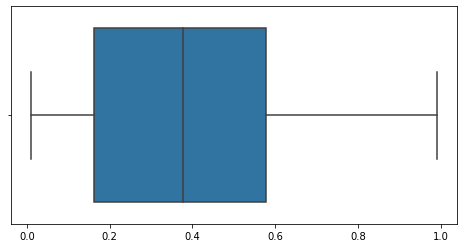

In [47]:
# ARIMA 모델의 차분 여부를 결정하기 위한 단위근 검정
def adf_test(y):
    return ADFTest().should_diff(y)[0]


## 전체 상점 adf_test p-value 값을 리스트에 저장해 boxplot
adf_p = []
count = 0
skipped = []
for i in tqdm(resampling_data['store_id'].unique()):
    ts = time_series(resampling_data, i)
    try:
        p_val = adf_test(ts)
        if p_val < 0.05:
            count += 1
        adf_p.append(p_val)
    except:
        skipped.append(i)
        
        
plt.figure(figsize=(8, 4))
sns.boxplot(adf_p)

In [48]:
# p-value가 0.05보다 작은 상점의 개수
print(count)

259


In [49]:
# ADF_Test 오류 상점 개수(결과값 나오지 않음)
if skipped:
    print(f"WarningCount: {len(skipped)}, store_id_list:{skipped}")

* 2019년 3~5월 매출의 총합을 예측하는 것이 목표

## 4.4 모델 구축과 검증

* 4.4.1 파이썬에서 R 시계열 패키지 forecast를 통한 모델링


* R 패키지를 설치하는 과정과 코드

In [50]:
from rpy2.robjects.packages import importr #rpy2 내의 패키지를 불러올 importr 클래스

utils = importr('utils') #utils 패키지를 임포트
utils.install_packages('forecast') # import한 utils 패키지를 가지고 install packages 함수를 이용해서 r의 forecast 패키지 설치.
utils.install_packages('forecastHybrid') #r의 forcastHybrid 패키지 설치

rpy2.rinterface.NULL

In [51]:
import rpy2.robjects as robjects # rpy2의 robject를 통해서 r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # pandas2ri는 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화
pandas2ri.activate() # r에서만 사용 가능한 자료형과 파이썬에서만 사용 가능한
# 자료형을 서로 호환 가능하게 해주는 모듈이다.

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월 (h=3)을 예측
        out_df = data.frame(forecasted_data$mean) #예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') #amount라는 열로 이름을 지정
        out_df
    }
"""

auto_arima = robjects.r(auto_arima) #r object의 r함수는 r코드로 정의된 함수와 r의 내장함수를 파이썬에서 사용할 수 있게 해줌.
# 즉, str형식과 r코드로 정의된 auto_arima함수는 forecast패키지를 로드
# auto.arima 함수를 이용해서 모델을 생성, 상점의 미래 3개월 매출액으로
# 변환해주는 함수입니다.



# 또한 robjects의 r() 함수는 시계열 자료형을 생성해주는 ts함수와
# 벡터를 생성해주는 c함수를 사용할 수 있게 합니다. 
ts = robjects.r('ts') # 또한 robjects의 r() 함수는 자료형을 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # 자료형을 벡터를 만들어주는 함수



store_0 = resampling_data[resampling_data['store_id']==0]
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월


train = ts(store_0['amount'], start=c(start_year, start_month), frequency=12)
# R의 ts 함수로 r의 time series 자료형으로 변환
# ts함수의 start인자에는
# # 해당 시작년도와 월을 c를 이용해서 r의 자료형인 벡터의 형태로 넘겨준다.
# frequency 인자에는 1년이 12개월이므로 12를 넣어주었다.



# ensemble model
forecast = auto_arima(train)
# auto_arima 함수는 r의 데이터프레임 자료형으로 예측값을 반환한다.


np.sum(pandas2ri.ri2py(forecast).values) 
# 따라서 pandas2ri 모듈에 있는 ri2py 함수를 사용해서 
# r 자료형을 파이썬 자료형으로 변환했고 마지막으로 넘파이의 sum함수를 통해서
# 3개월 매출액의 총합계를 계산하였다



#3개월 매출을 합산

2007226.9722140946

* pandas2ri 모듈에 포함된 ri2py 메소드를 사용해 r자료형을 파이썬 자료형으로 변환


* 그 이후에 마지막으로 numpy의 sum 함수를 통해서 3개월 매출액의 총합계를 계산

In [52]:
# import numpy as np

In [53]:
# a = np.array([[1,2],
#              [3,4]])
# s = np.sum(a)
# print(s)

In [54]:
# store_0

In [55]:
# print(store_0['year_month'])

## 4.4.2 시계열 모델 선택과 검증

* AR 모델은 자기회귀 모델

* => 미래 예측에 자기 과거를 사용하는 특성으로 인해 이름이 붙여짐(자신의 이전 관측값이 이후 관측값에 영향을 주는 모델)

* MA 모델은 이동평균 과정으로, 

* 현재 시계열 데이터가 과거 잔차들의 가중평균으로 구성되는 모델

* 잔차항은 백색잡음을 의미하며, 현재 데이터는 과거 백색잡음의 평균값으로 설명된다.

* (백색잡음 : 시계열 분석에서 오차항)

## 자귀회귀누적이동평균 모델(ARIMA)

* (=>ARIMA(p, d, q))

* p : 자기회귀의 부분 차수, d : 1차 차분이 포함된 정도, q : 이동평균의 부분 차수

* 차분 = 평균이 일정하지 않은 시계열 데이터를 평균이 일정하게 되도록 해주는 기법

* 자기회귀누적이동평균 모델은 데이터가 비정상성이 아닌 증거를 나타내는 경우에 적용되며,

* 초기 차분 단계(모델의 "통합된" 부분에 해당)를 한 번 이상 적용하여 비정상성을 제거할 수 있다. (p d q)에서 d에 해당

In [56]:
import rpy2.robjects as robjects #r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri #파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화
pandas2ri.activate()

auto_arima = """
    function(ts){
    library(forecast) #forecast 패키지 로드
    d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
    model = auto.arima(ts, max.p=2, d=d_params) #auto.arima 모델 생성
    forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
    out_df = data.frame(forecasted_data$mean) #예측값을 R의 데이터프레임으로 변환
    colnames(out_df) = c('amount') #amount라는 열로 이름을 지정
    out_df
    }
"""
# r()함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima) # str 형식으로 정의된 auto_arima
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) #영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) #영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12)
    # 자동회귀누적이동평균 model
    forecast = auto_arima(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [02:18<00:00, 14.25it/s]


* 3개월 매출액 총합을 예측해서 상점별로 추가한다.

In [57]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,2.007227e+06
1,1,2.886210e+05
2,2,1.393309e+06
3,4,2.697649e+06
4,5,8.291391e+05
...,...,...
1962,2132,2.190377e+06
1963,2133,7.414846e+05
1964,2134,9.818183e+04
1965,2135,1.755864e+06


## 지수평활법

* 단순 지수평활법은 가장 최근 관측값을 제일 중요하게 생각하고

* 이전의 모든 관측값은 미래를 예측할 때 아무런 정보도 주지 않는다고 가정

* 단순 지수평활법은 추세나 계절성이 없을 때 주로 사용

* 홀트의 선형추세 기법

* 추세가 있는 데이터를 예측할 수 있게 단순 지수평활법을 확장한 방법

* 단순지수평활법에서 현재 시계열의 관측값의 가중평균과 추세의 이동평균을 고려했다고 생각하면 된다.

* R의 forecast 패키지의 ets()함수는 여러 지수평활 모델 중 최적의 모델을 찾는 기능

* ets=>(단순지수평활법?, 홀트 기법? 다른 지수평활법을 활용했을 수도)

In [58]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화
pandas2ri.activate()




# r의 forecast 패키지에 있는 ets 함수를 사용해서
# 1967개의 상점에 가장 적합한 지수평활 모델을 찾고
# 예측을 진행해 보는 과정을 보여준다.

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') #amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets) # str 형식으로 정의된 ets
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []


# 반복문을 통해서 상점 아이디별로 지수평활 모델을 생성하고
# 리스트 자료형인 final_pred에 미래 3개월 매출액 총합을
# 예측해 상점별로 추가한다. 이제 submission 파일을 생성하고
# 출력 결과를 확인
for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    #R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12)
    # 지수 평활법
    forecast = ets(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))
    # pandas2ri 모듈에 있는 ri2py 함수를 사용해서 
    # r 자료형을 파이썬 자료형으로 변환했고 마지막으로 넘파이의 sum함수를 통해서
    # 3개월 매출액의 총합계를 계산하였다


100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [14:55<00:00,  2.20it/s]


* 3개월 매출액 총합을 예측해서 상점별로 추가한다.

In [59]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,2.060501e+06
1,1,2.878790e+05
2,2,1.260318e+06
3,4,2.668637e+06
4,5,7.091162e+05
...,...,...
1962,2132,2.190512e+06
1963,2133,3.488475e+05
1964,2134,4.249576e+05
1965,2135,1.622992e+06


## STL 분해를 적용한 지수평활법

* STL은 시계열 분해 기법의 약자로 시계열 데이터가 가진 시간 주기를 알고 있는 경우 시계열 데이터를 계절성과 추세,

* 나머지 성분으로 분해해 분석하는 기법

* (Seasonal and Trend decomposition using Loess)

* 파이썬의 statsmodels에서 seasonal_decompose() 함수는 STL 분해 기능을 제공한다.

* 첫 번째 인자에 numpy array형식으로 매출액 데이터를 넘겨준다. freq 인자는 월별로 다운 샘플링했고, 1년은 12개월이므로 12로 설정

* stl분해를 하는 이유는 매출의 전반적인 트렌트, 계절성 등을 고려해야

* 정확한 모델을 만들 수 있기 때문입니다.

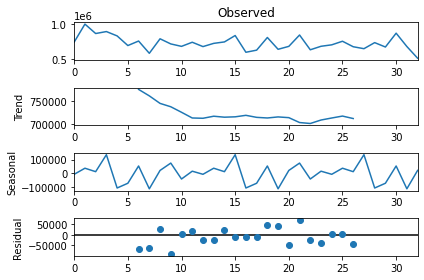

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

store_0 = time_series(resampling_data, 0)

# STL 분해
stl = seasonal_decompose(store_0.values, freq=12)
stl.plot()
plt.show()

* 첫 번째 = 관측된 실제 매출액.

* 두 번째 = 추세

* 세 번째 = 계절성

* 네 번째 = 나머지 성분

* 즉, 첫 번째는 실제 관측값은 추세 + 계절성 + 나머지 성분

*
*

* stlm()메소드의 인자 중 s.windows = 계절 윈도우

* t.windows는 추세 윈도우

* 계절 성분을 주기적으로 고정하기 위해 periodic으로 설정

* t.windows는 아무런 값을 넣어주지 않아 기본값으로 설정함

In [61]:
# stl 분해를 적용하고
# 지수평활법을 통해 예측까지 진행하는 과정은 r의 forecast의 stlm() 
# 함수를 사용하여 진행하였고 이걸 반영해서
# 밑에 코드를 보시게 되면 stlm 함수를 사용해서 1967개 상점을 
# stl 분해를 하고 지수평활법을 통해 예측하는 과정을 진행한 코드


import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
# pandas2ri를 활성화
pandas2ri.activate()
stlm = """
    function(ts){
    library(forecast) # forecast 패키지 로드
    model = stlm(ts, s.window="periodic", method='ets') # STL 분해 후 지수평활법을 통한 예측
    forecasted_data = forecast(model, h=3) # 이후 3개월(h3)을 예측
    out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
    colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
    out_df
    
}
"""

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) #AIC가 낮은 지수평활 모델을 찾음
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) #예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') #amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r을 파이썬에서 사용 가능
stlm = robjects.r(stlm) # str 형식으로 정의된 stlm
ets = robjects.r(ets) # str 형식으로 정의된 ets
ts = robjects.r('ts') # 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수




# 반복문을 통해서 상점 아이디별로 기본 지수평활법과 stl분해 반영한 
# 지수평활모델을 생성하고
# 리스트 자료형인 final_pred에 미래 3개월 매출액 총합을
# 예측해 상점별로 추가한다.

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    data_len = len(store)
    
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12)
    #STL 분해를 적용한 지수평활 model
    if data_len > 24:
        forecast = stlm(train)
    # 지수평활 model
    else:
        forecast = ets(train) #3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [02:10<00:00, 15.08it/s]


* stlm()함수는 STL 분해를 적용할 때 최소 24개월 보다 많은 데이터를 요구한다.

* 그러므로 상점별 데이터 길이를 구해서 24개월보다 많은경우

* STL 분해를 적용

*
*

* 3개월 매출액 총합을 예측해서 상점별로 추가한다.

In [62]:
# submission 파일을 생성하고
# 출력 결과를 확인
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,2.094277e+06
1,1,2.774723e+05
2,2,1.164701e+06
3,4,2.750955e+06
4,5,9.395993e+05
...,...,...
1962,2132,2.138210e+06
1963,2133,8.242583e+05
1964,2134,4.061268e+05
1965,2135,1.578473e+06


## 4.5 성능 향상을 위한 방법

* 지금까지 자기회귀누적이동평균 모델, 지수평활법, STL 분해를 적용한 지수평활법을 사용해서 상점의 3개월 총매출 예측

* 지수평활법을 통한 예측이 가장 좋은 점수 얻음

#### 4.5.1 상점 매출액의 로그 정규화

In [63]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) #예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp') # 로그 역변환 함수

# 0번 상점 추출
store_0 = resampling_data[resampling_data['store_id']==0]
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월

# train, test 분리
train = store_0[store_0.index <= len(store_0) - 4]
test = store_0[store_0.index > len(store_0) - 4]

#R의 ts 함수로 r의 time series 자료형으로 변환
#log 정규화
train_log = ts(log(train['amount']), start=c(start_year, start_month), frequency=12)

#log 정규화를 하지 않음
train = ts(train['amount'], start=c(start_year, start_month), frequency=12)

# model arima
forecast_log = auto_arima(train_log)
forecast = auto_arima(train)

# pred
pred_log = np.sum(pandas2ri.ri2py(exp(forecast_log)).values) # 로그 역변환 후 3개월 합산
pred = np.sum(pandas2ri.ri2py(forecast).values) # 3개월 매출을 합산

# test(2018-12-2019-02)
test = np.sum(test['amount'])

#MAE
print('log-regularization mae: ', abs(test-pred_log))
print('mae:', abs(test-pred))

log-regularization mae:  2401.9664819482714
mae: 25197.053143496625


In [64]:
#매출 변동 계수를 구하는 함수(변동계수 = 표준편차 / 평균)
def coefficient_variation(df, i):
    cv_data = df.groupby(['store_id']).amount.std()/df.groupby(['store_id']).amount.mean()
    cv = cv_data[i]
    return cv

In [65]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화
pandas2ri.activate()
ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') #amount라는 열로 이름을 지정
        out_df
    }
"""

# r()함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp') # 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12)
        # ets model
        forecast_log = ets(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values))
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 지수평활법
        forecast = ets(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [18:47<00:00,  1.74it/s]


In [66]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,1.963401e+06
1,1,2.483335e+05
2,2,1.260318e+06
3,4,2.660373e+06
4,5,7.091162e+05
...,...,...
1962,2132,2.122653e+06
1963,2133,3.488475e+05
1964,2134,4.249576e+05
1965,2135,1.603989e+06


### 4.5.2 파이썬에서 R 시계열 패키지 forecastHybrid를 통한 앙상블

In [67]:
# 평균 앙상블을 사용
# 자기회귀누적이동평균 모델, 지수평활법, STL 분해를 적용한 지수평활법으로 3개의 예측치를 생성한 다음, 평균값을 구해 최종 매출액을 계산
# 앙상블은 여러 모델을 결합해서 예측하는 것이므로 과적합을 방지하는 효과가 있다. 또한 개별 모델의 성능이 잘 안나오면 앙상블 이용하면 성능 향상 이룬다.
# R의 forecastHybrid 패키지를 사용해 시계열 모델에 대한 앙상블을 작성 = > hybridModel() 함수가 이 기능을 제공

In [68]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

#pandas2ri를 활성화
pandas2ri.activate()

hybridModel = """
    function(ts){
        library(forecast)
        library(forecastHybrid)
        d_params=ndiffs(ts)
        hb_mdl<-hybridModel(ts, models="aes", #auto_arima, ets, stlm)
                        a.arg=list(max.p=2, d=d_params), #auto_arima parameter
                        weight="equal") # 가중치를 동일하게 줌(평균)
        forecasted_data<-forecast(hb_mdl, h=3) # 이후 3개월(h=3)을 예측
        outdf<-data.frame(forecasted_data$mean)
        colnames(outdf)<-c('amount')
        outdf
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능 hybridModel = robjects.r(hybridModel)
hybridModel = robjects.r(hybridModel)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp') # 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year, start_month), frequency=12)
        # 앙상블 예측
        forecast_log = hybridModel(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values))
    
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year, start_month), frequency=12)
        # 앙상블 예측
        forecast = hybridModel(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [22:12<00:00,  1.48it/s]


In [69]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,1.973673e+06
1,1,2.700469e+05
2,2,1.279552e+06
3,4,2.695279e+06
4,5,8.240620e+05
...,...,...
1962,2132,2.115933e+06
1963,2133,6.311052e+05
1964,2134,3.021292e+05
1965,2135,1.626442e+06
